# KMeans Clustering

## Imports

In [1]:
# import packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# import data with Customer Id as index
df = pd.read_csv('Data/cust_seg.csv', index_col = 'Customer Id')

In [3]:
# preview data
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
# drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# verify changes
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
# check for missing values
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
# drop missing values
df = df.dropna()

In [8]:
# verify changes
df.isna().sum().sum()

0

In [9]:
# check for duplicate values
df.duplicated().sum()

0

In [10]:
# view summary statistics
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


## Scale Data

In [11]:
# instantiate scaler
scaler = StandardScaler()

In [12]:
# fit and transform df
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [13]:
# preview scaled df
X_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609


C:\Users\eliud\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\eliud\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\eliud\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\eliud\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

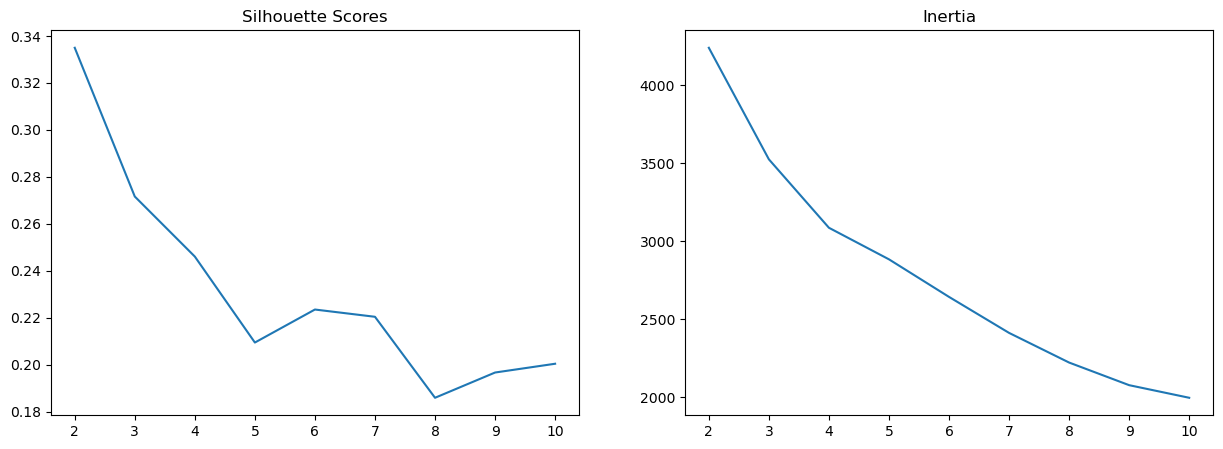

In [14]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Choosing 3 clusters based on significant decrease in silhouette score and it being the first elbow in the inertia viz

In [15]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

C:\Users\eliud\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,2
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


## Analyzing the Clusters

In [16]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
1,1,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
2,2,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


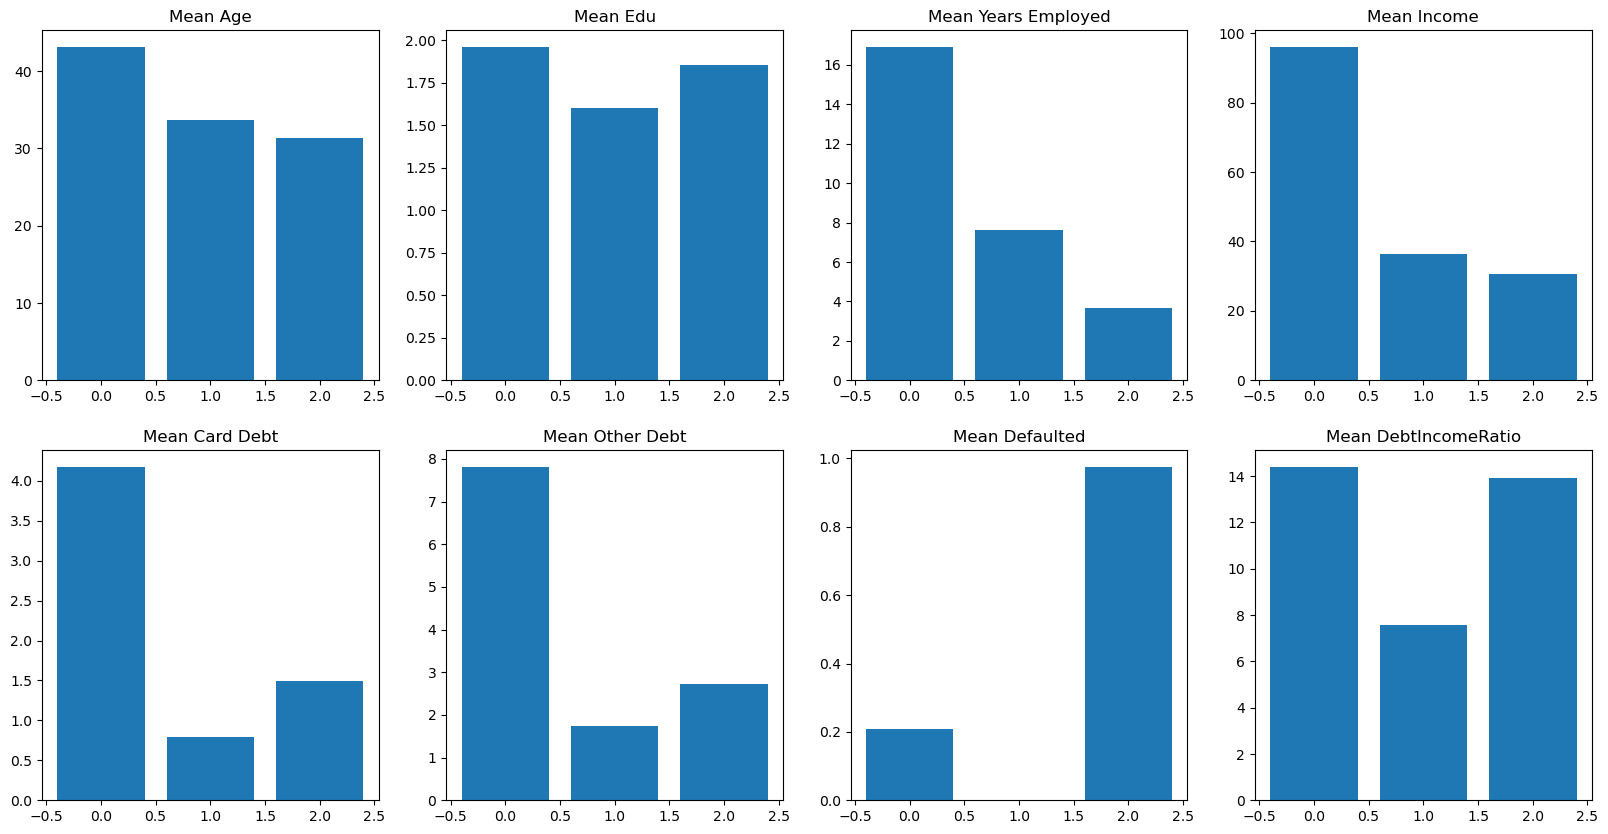

In [17]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

## Cluster Descriptions

Cluster 0 is the highest cluster for means for all features, with the exception of Mean Defaulted, where the mean of the values is very low. This means Cluster 0 generally consists of customers aged above 40, with more than 16 years employed, and an income of more than about 90,000. They also have the highest amounts of debt, and debt-to-income ratio.

In [ ]:
Cluster 1 is 

Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit cards differently or which cards they should market to each cluster based on your data and insights.